Loading datasets...
Datasets loaded successfully.

--- Customer DataFrame Head ---
   customer_Id         DOB Gender  city_code
0       268408  02-01-1970      M        4.0
1       269696  07-01-1970      F        8.0
2       268159  08-01-1970      F        8.0
3       270181  10-01-1970      F        2.0
4       268073  11-01-1970      M        1.0

--- Product Category Info DataFrame Head ---
   prod_cat_code  prod_cat  prod_sub_cat_code prod_subcat
0              1  Clothing                  4        Mens
1              1  Clothing                  1       Women
2              1  Clothing                  3        Kids
3              2  Footwear                  1        Mens
4              2  Footwear                  3       Women

--- Transactions DataFrame Head ---
   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5

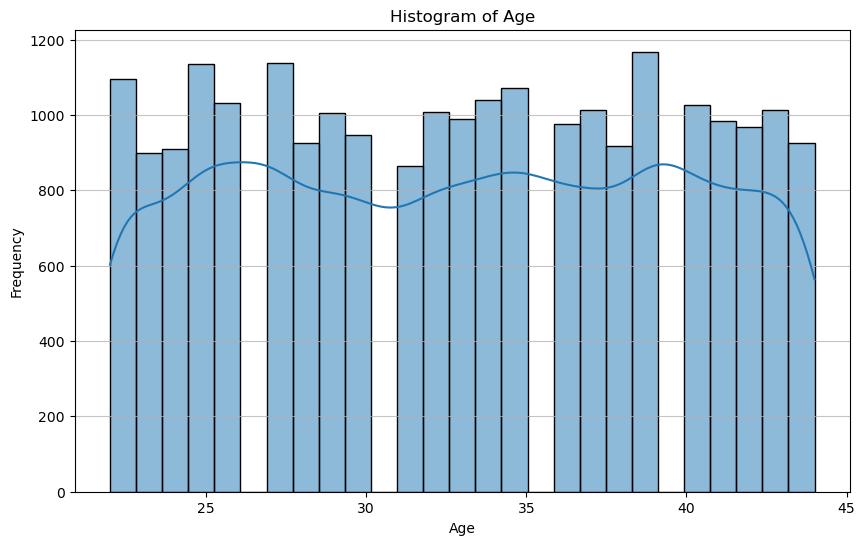

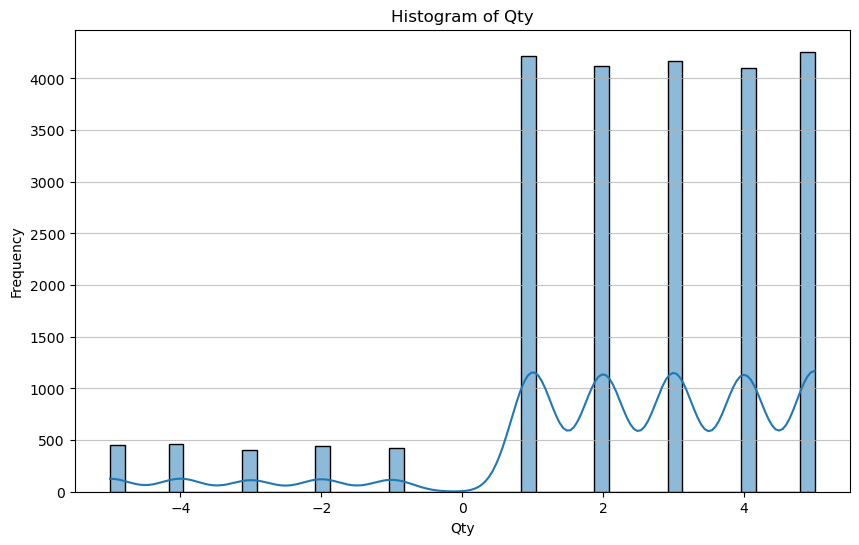

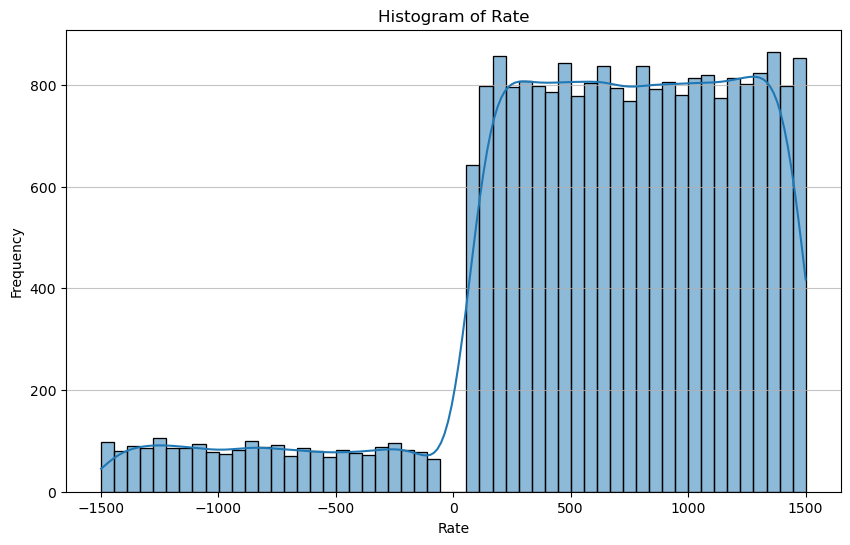

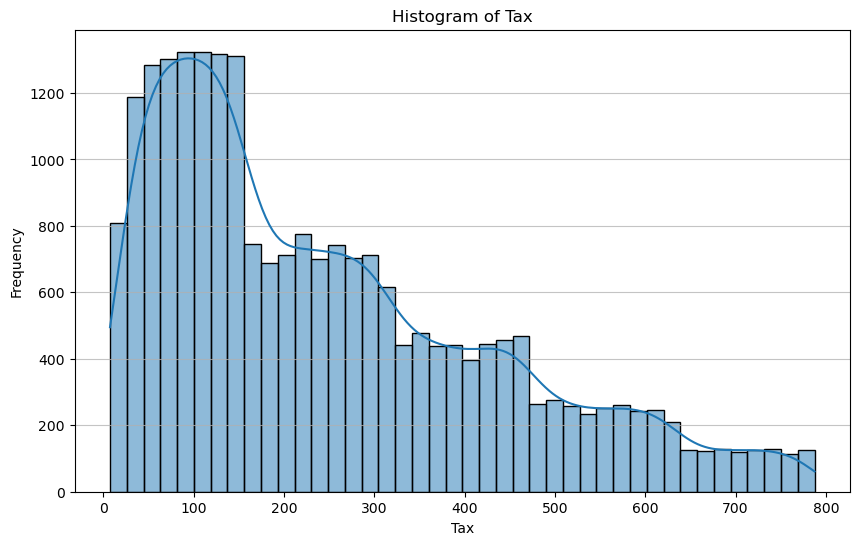

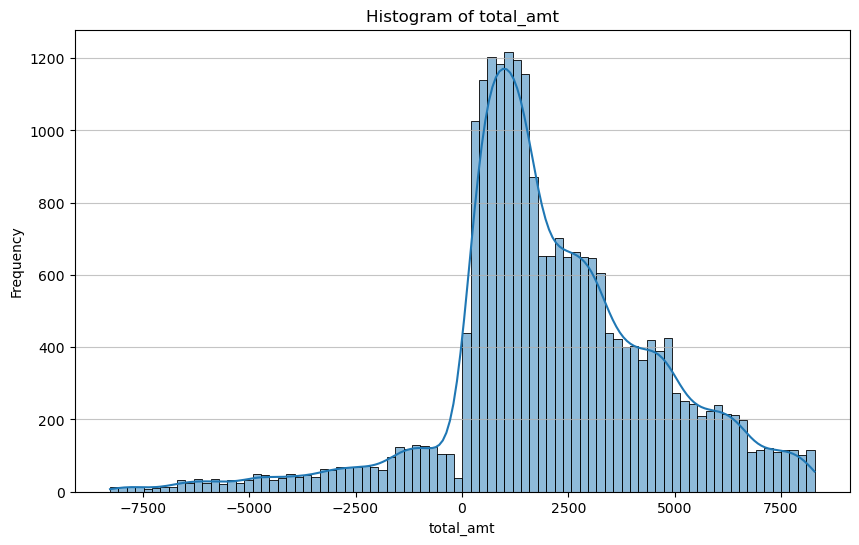

C:\Users\DELL\AppData\Local\Temp\ipykernel_5572\2454708972.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, y=var, order=plot_data[var].value_counts().index, palette='viridis')


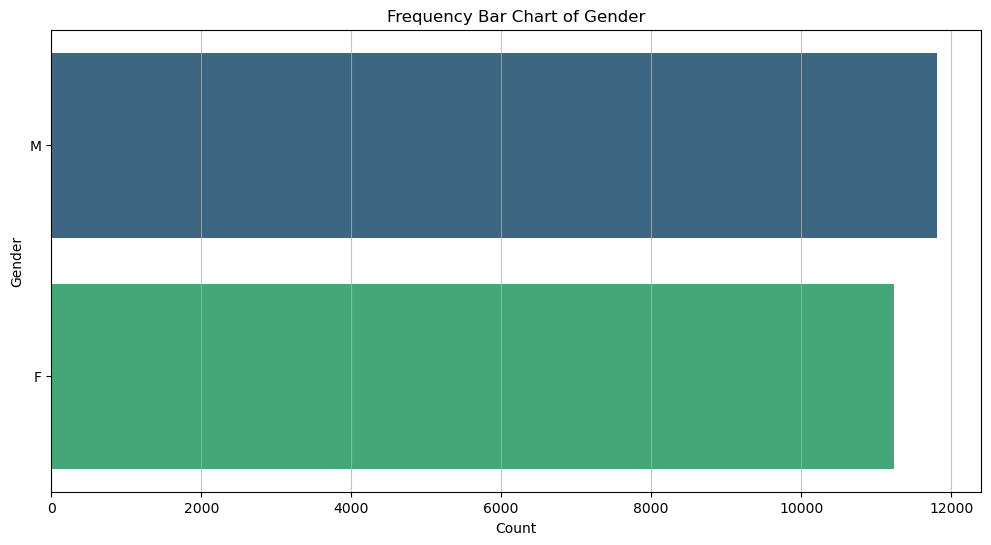

C:\Users\DELL\AppData\Local\Temp\ipykernel_5572\2454708972.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, y=var, order=plot_data[var].value_counts().index, palette='viridis')


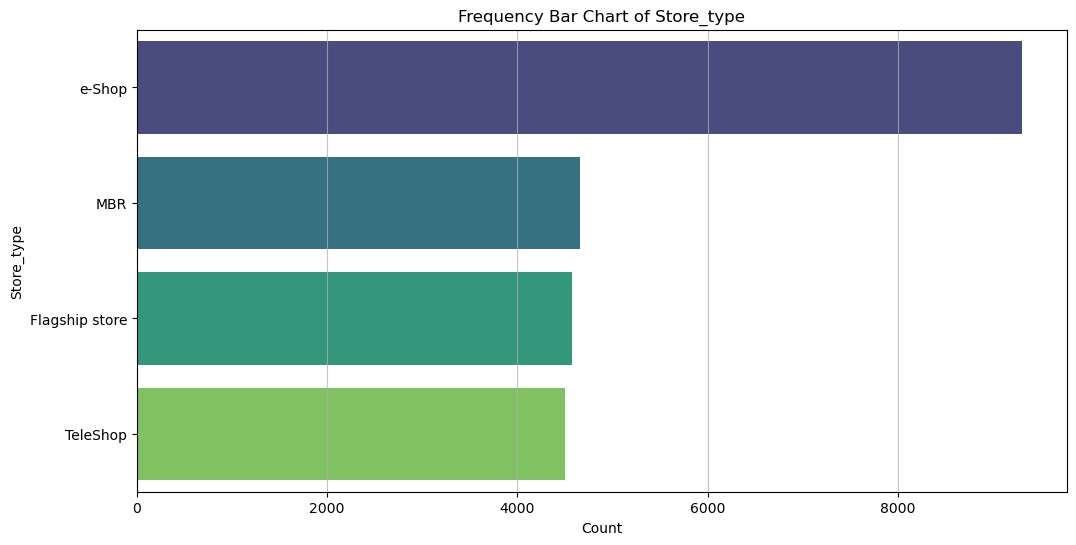

C:\Users\DELL\AppData\Local\Temp\ipykernel_5572\2454708972.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, y=var, order=plot_data[var].value_counts().index, palette='viridis')


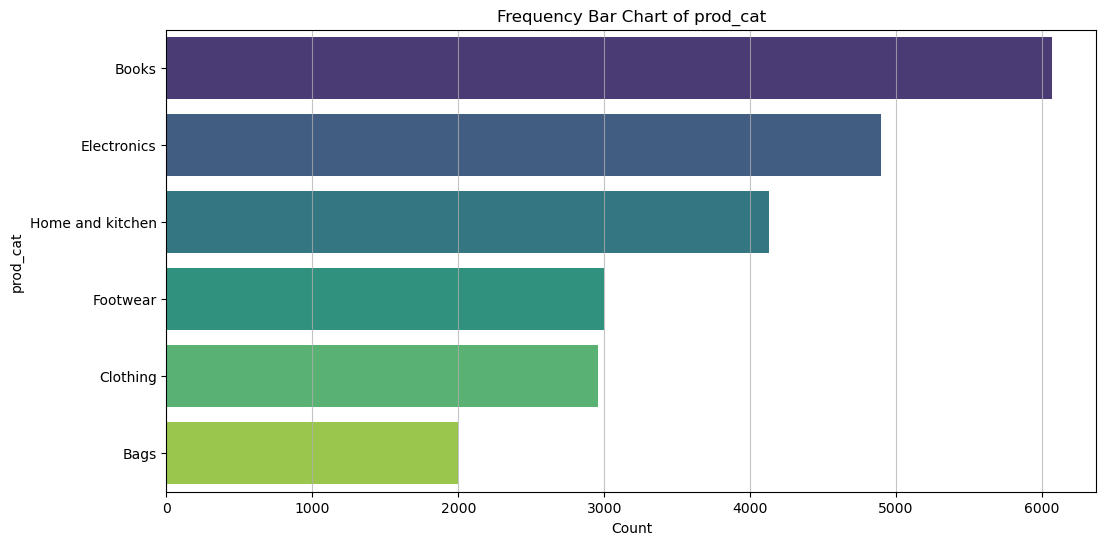

C:\Users\DELL\AppData\Local\Temp\ipykernel_5572\2454708972.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_data, y=var, order=plot_data[var].value_counts().index, palette='viridis')


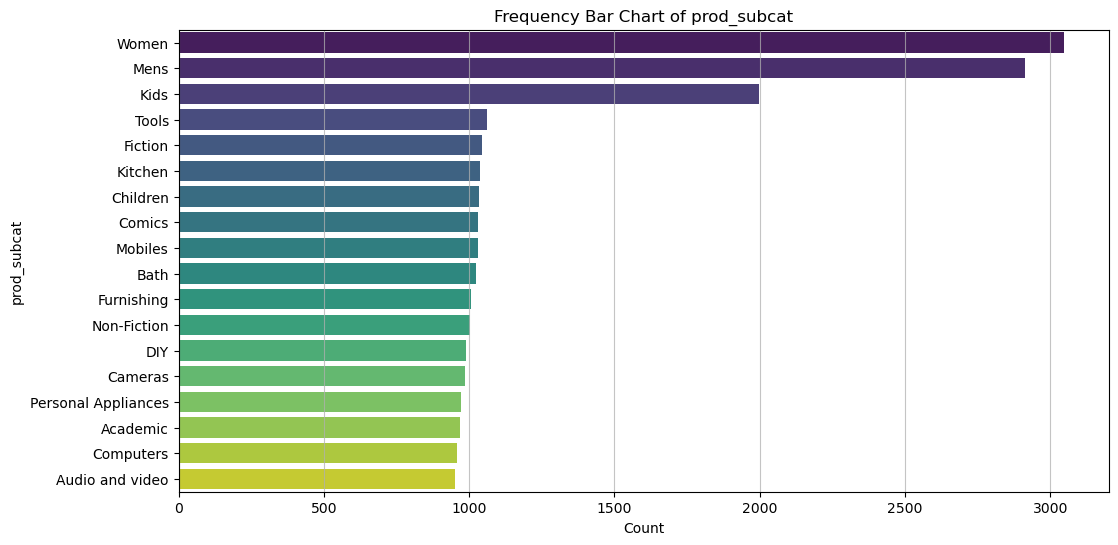


--- Calculating Additional Information ---

Time period of available transaction data: From 2011-02-01 to 2014-02-12

Number of transactions with negative total amount (returns): 2177

Product Categories Popularity by Gender (Total Quantity Sold):
prod_cat  Bags  Books  Clothing  Electronics  Footwear  Home and kitchen
Gender                                                                  
F         2362   7070      3425         5832      3716              4895
M         2346   7587      3748         6476      3555              5041


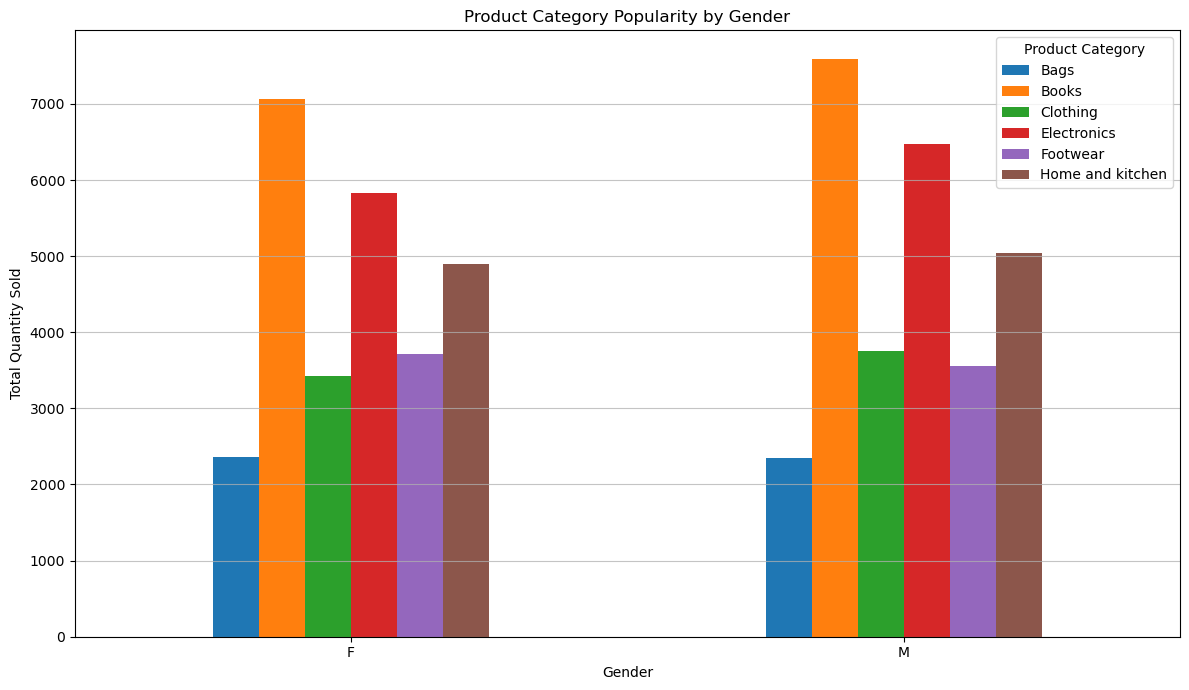



Store Type with Maximum Sales by Value:
Store_type
e-Shop            1.982482e+07
Flagship store    9.715688e+06
MBR               9.674486e+06
TeleShop          9.364781e+06
Name: total_amt, dtype: float64
Store type with maximum sales by value: e-Shop ($19,824,816.05)

Store Type with Maximum Sales by Quantity:
Store_type
e-Shop            22763
MBR               11194
Flagship store    11133
TeleShop          10984
Name: Qty, dtype: int64
Store type with maximum sales by quantity: e-Shop (22763 units)

Total amount earned from 'Electronics' and 'Clothing' categories from Flagship Stores: $3,409,559.27

Total amount earned from 'Male' customers under the 'Electronics' category: $5,703,109.42

Number of customers with more than 10 unique transactions (excluding returns): 6
Customer IDs with more than 10 unique transactions:
[266794, 270535, 270803, 272741, 273014, 274227]

Total amount spent by customers aged 25-35 for 'Electronics' and 'Books' categories: $11,357,840.84
Total amoun

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# --- 1. Load Datasets ---
print("Loading datasets...")
try:
    customer_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\Case Study 1 - Retail Case Study\Customer.csv")
    prod_cat_info_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\Case Study 1 - Retail Case Study\prod_cat_info.csv")
    transactions_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\assignment\Case Study 1 - Retail Case Study\Transactions.csv")
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading file: {e}. Please ensure Customer.csv, prod_cat_info.csv, and Transactions.csv are in the same directory.")
    exit() # Exit if files are not found

# Display first few rows of each dataframe to understand their structure
print("\n--- Customer DataFrame Head ---")
print(customer_df.head())
print("\n--- Product Category Info DataFrame Head ---")
print(prod_cat_info_df.head())
print("\n--- Transactions DataFrame Head ---")
print(transactions_df.head())

# --- 2. Merge Datasets ---

# Rename columns for merging
# prod_cat_info_df has 'prod_sub_cat_code' and 'prod_cat_code' which match 'prod_subcat_code' and 'prod_cat_code' in transactions_df
# customer_df has 'customer_Id' which matches 'cust_id' in transactions_df
transactions_df.rename(columns={'cust_id': 'customer_Id'}, inplace=True)
prod_cat_info_df.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'}, inplace=True)

# Merge transactions with product category info
# Using left merge to keep all transactions and add product details
merged_df = pd.merge(transactions_df, prod_cat_info_df, on=['prod_cat_code', 'prod_subcat_code'], how='left')

# Merge the result with customer information
# Using inner merge to keep only customers who have done transactions
Customer_Final = pd.merge(customer_df, merged_df, on='customer_Id', how='inner')

print("\n--- Merged Customer_Final DataFrame Head ---")
print(Customer_Final.head())
print(f"\nShape of Customer_Final: {Customer_Final.shape}")

# --- Robustness Check: Ensure Customer_Final is not empty and has required columns ---
if Customer_Final.empty:
    print("Error: Customer_Final DataFrame is empty after merging. Cannot proceed with analysis.")
    exit()

# Define essential columns needed for the analysis
required_cols = ['Gender', 'City_Code', 'Store_type', 'prod_cat', 'prod_subcat',
                 'Qty', 'Rate', 'Tax', 'total_amt', 'DOB', 'tran_date',
                 'customer_Id', 'transaction_id']

missing_cols = [col for col in required_cols if col not in Customer_Final.columns]
if missing_cols:
    print(f"Error: Missing required columns in Customer_Final after merge: {missing_cols}. Cannot proceed with analysis.")
    print("Please check your CSV files and merge logic.")
    exit()


# --- 3. Prepare a Summary Report for the Merged Dataset ---

print("\n--- Summary Report for Customer_Final ---")

# a. Get the column names and their corresponding data types
print("\nColumn Names and Data Types:")
print(Customer_Final.info())

# b. Top/Bottom 10 observations
print("\nTop 10 Observations:")
print(Customer_Final.head(10))
print("\nBottom 10 Observations:")
print(Customer_Final.tail(10))

# c. "Five-number summary" for continuous variables (min, Q1, median, Q3 and max)
print("\nFive-number summary for Continuous Variables:")
print(Customer_Final.describe())

# d. Frequency tables for all the categorical variables
print("\nFrequency Tables for Categorical Variables:")
for col in Customer_Final.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(Customer_Final[col].value_counts())

# --- 4. Generate Histograms and Frequency Bars ---

print("\n--- Generating Visualizations ---")

# Convert 'DOB' and 'tran_date' to datetime objects
# 'DOB' uses hyphen-separated dates (e.g., "02-01-1970")
# Using errors='coerce' to turn unparseable dates into NaT
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%d-%m-%Y', errors='coerce')
# 'tran_date' uses slash-separated dates (e.g., "12/12/2013")
# Using errors='coerce' to turn unparseable dates into NaT
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'], format='%d/%m/%Y', errors='coerce')

# Check for any NaT values introduced after conversion
if Customer_Final['DOB'].isnull().any():
    print("\nWarning: Some 'DOB' values could not be parsed and were converted to NaT.")
if Customer_Final['tran_date'].isnull().any():
    print("\nWarning: Some 'tran_date' values could not be parsed and were converted to NaT.")

# Calculate Age based on DOB (assuming current year for simplicity or a fixed reference year)
# Let's use a reference date for age calculation, e.g., the latest transaction date or a fixed date like 2015-01-01
reference_date = pd.to_datetime('2015-01-01') # A reasonable reference date after the data ends
# Filter out NaT values from DOB before calculating age to avoid errors
# Ensure 'Age' column is created even if DOB has NaT values initially, then fill NaT for Age
Customer_Final['Age'] = ((reference_date - Customer_Final['DOB']).dt.days / 365.25)
Customer_Final['Age'] = Customer_Final['Age'].fillna(0).astype(int) # Fill NaNs with 0 or another suitable value before converting to int

# Continuous variables for histograms
continuous_vars = ['Age', 'Qty', 'Rate', 'Tax', 'total_amt']
for var in continuous_vars:
    if var in Customer_Final.columns: # Check if column exists
        plt.figure(figsize=(10, 6))
        # Drop NA values for plotting to avoid errors
        sns.histplot(Customer_Final[var].dropna(), kde=True)
        plt.title(f'Histogram of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print(f"Warning: Continuous variable column '{var}' not found in Customer_Final. Skipping histogram.")


# Categorical variables for frequency bars
categorical_vars = ['Gender', 'City_Code', 'Store_type', 'prod_cat', 'prod_subcat']
for var in categorical_vars:
    if var in Customer_Final.columns: # Check if column exists
        plt.figure(figsize=(12, 6))
        # Drop NA values for plotting to avoid errors, and ensure value_counts is not empty
        plot_data = Customer_Final.dropna(subset=[var])
        if not plot_data.empty:
            sns.countplot(data=plot_data, y=var, order=plot_data[var].value_counts().index, palette='viridis')
            plt.title(f'Frequency Bar Chart of {var}')
            plt.xlabel('Count')
            plt.ylabel(var)
            plt.grid(axis='x', alpha=0.75)
            plt.show()
        else:
            print(f"Warning: No valid data for categorical variable '{var}' after dropping NaNs. Skipping frequency bar chart.")
    else:
        print(f"Warning: Categorical variable column '{var}' not found in Customer_Final. Skipping frequency bar chart.")

# --- 5. Calculate Additional Information ---

print("\n--- Calculating Additional Information ---")

# a. Time period of the available transaction data
# Drop NaT values from tran_date before finding min/max
min_date = Customer_Final['tran_date'].dropna().min()
max_date = Customer_Final['tran_date'].dropna().max()
print(f"\nTime period of available transaction data: From {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")

# b. Count of transactions where the total amount of transaction was negative
negative_transactions_count = Customer_Final[Customer_Final['total_amt'] < 0].shape[0]
print(f"\nNumber of transactions with negative total amount (returns): {negative_transactions_count}")

# 6. Analyze which product categories are more popular among females vs male customers.
gender_product_popularity = Customer_Final.groupby(['Gender', 'prod_cat'])['Qty'].sum().unstack()
print("\nProduct Categories Popularity by Gender (Total Quantity Sold):")
print(gender_product_popularity)

# Visualize gender-product popularity
gender_product_popularity.plot(kind='bar', figsize=(12, 7))
plt.title('Product Category Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 7. Which City code has the maximum customers and what was the percentage of customers from that city?
if 'City_Code' in Customer_Final.columns: # Added check for City_Code
    customer_city_counts = Customer_Final.groupby('City_Code')['customer_Id'].nunique().sort_values(ascending=False)
    if not customer_city_counts.empty:
        max_customers_city = customer_city_counts.index[0]
        max_customers_count = customer_city_counts.iloc[0]
        total_unique_customers = Customer_Final['customer_Id'].nunique()
        percentage_from_max_city = (max_customers_count / total_unique_customers) * 100

        print(f"\nCity Code with maximum customers: {max_customers_city} with {max_customers_count} unique customers.")
        print(f"Percentage of customers from City {max_customers_city}: {percentage_from_max_city:.2f}%")
    else:
        print("\nWarning: No customer data found to determine city with maximum customers.")
else:
    print("\nWarning: 'City_Code' column not found in Customer_Final. Cannot determine city with maximum customers.")


# 8. Which store type sells the maximum products by value and by quantity?
store_sales_value = Customer_Final.groupby('Store_type')['total_amt'].sum().sort_values(ascending=False)
store_sales_quantity = Customer_Final.groupby('Store_type')['Qty'].sum().sort_values(ascending=False)

print("\nStore Type with Maximum Sales by Value:")
print(store_sales_value)
print(f"Store type with maximum sales by value: {store_sales_value.index[0]} (${store_sales_value.iloc[0]:,.2f})")

print("\nStore Type with Maximum Sales by Quantity:")
print(store_sales_quantity)
print(f"Store type with maximum sales by quantity: {store_sales_quantity.index[0]} ({store_sales_quantity.iloc[0]} units)")

# 9. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
flagship_sales = Customer_Final[
    (Customer_Final['Store_type'] == 'Flagship store') &
    (Customer_Final['prod_cat'].isin(['Electronics', 'Clothing']))
]
total_earned_flagship = flagship_sales['total_amt'].sum()
print(f"\nTotal amount earned from 'Electronics' and 'Clothing' categories from Flagship Stores: ${total_earned_flagship:,.2f}")

# 10. What was the total amount earned from "Male" customers under the "Electronics" category?
male_electronics_sales = Customer_Final[
    (Customer_Final['Gender'] == 'M') &
    (Customer_Final['prod_cat'] == 'Electronics')
]
total_earned_male_electronics = male_electronics_sales['total_amt'].sum()
print(f"\nTotal amount earned from 'Male' customers under the 'Electronics' category: ${total_earned_male_electronics:,.2f}")

# 11. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?
# Filter out negative amounts
positive_transactions = Customer_Final[Customer_Final['total_amt'] >= 0]

# Count unique transactions per customer
customer_transaction_counts = positive_transactions.groupby('customer_Id')['transaction_id'].nunique()

# Filter customers with more than 10 unique transactions
customers_more_than_10_transactions = customer_transaction_counts[customer_transaction_counts > 10]

print(f"\nNumber of customers with more than 10 unique transactions (excluding returns): {len(customers_more_than_10_transactions)}")
print("Customer IDs with more than 10 unique transactions:")
print(customers_more_than_10_transactions.index.tolist())

# 12. For all customers aged between 25-35, find out:

# a. What was the total amount spent for "Electronics" and "Books" product categories?
customers_25_35 = Customer_Final[(Customer_Final['Age'] >= 25) & (Customer_Final['Age'] <= 35)]
electronics_books_spent_25_35 = customers_25_35[
    customers_25_35['prod_cat'].isin(['Electronics', 'Books'])
]['total_amt'].sum()
print(f"\nTotal amount spent by customers aged 25-35 for 'Electronics' and 'Books' categories: ${electronics_books_spent_25_35:,.2f}")

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
start_date = pd.to_datetime('2014-01-01')
end_date = pd.to_datetime('2014-03-01')

spent_25_35_jan_mar_2014 = customers_25_35[
    (customers_25_35['tran_date'] >= start_date) &
    (customers_25_35['tran_date'] <= end_date)
]['total_amt'].sum()
print(f"Total amount spent by customers aged 25-35 between Jan 1, 2014 and Mar 1, 2014: ${spent_25_35_jan_mar_2014:,.2f}")

# --- Save the final merged DataFrame to CSV for HTML Dashboard ---
output_csv_path = 'Customer_Final.csv'
Customer_Final.to_csv(output_csv_path, index=False)
print(f"\nCustomer_Final DataFrame saved to {output_csv_path}")